In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()   # <- Select kaggle.json from your PC

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rithesh224252","key":"b8b399a34101e137f419c5f4d3d5eeb7"}'}

In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0
100% 5.18G/5.20G [01:31<00:00, 76.4MB/s]
100% 5.20G/5.20G [01:31<00:00, 60.9MB/s]


In [6]:
!unzip skin-cancer-mnist-ham10000.zip

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

In [7]:
# Import libraries for data preprocessing and model building
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Import evaluation metrics and handling class imbalance
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler  # Ensure this is installed

# Import visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Import TensorFlow and Keras components for model architecture and training
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, DenseNet121, VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models, regularizers
import keras

In [8]:
FilePath = "/content/hmnist_28_28_RGB.csv"
dataSet = pd.read_csv(FilePath)

In [9]:
# Extract the labels from the dataset and drop the label column from the feature set
Label = dataSet["label"]
Data = dataSet.drop(columns=["label"])

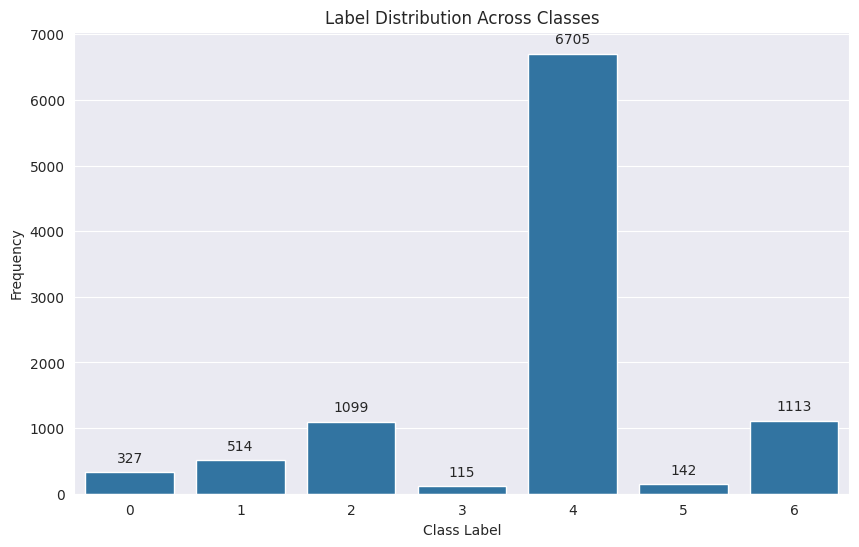

In [10]:
# Plot the distribution of labels with specified figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

# Create a count plot of the label distribution
ax = sns.countplot(x=Label)
plt.title("Label Distribution Across Classes")
plt.xlabel("Class Label")
plt.ylabel("Frequency")

# Annotate each bar with its count value for clarity
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [11]:
# Apply RandomOverSampler to balance the dataset
oversample = RandomOverSampler()
Data, Label = oversample.fit_resample(Data, Label)

# Reshape the oversampled data to the specified dimensions
Data = np.array(Data).reshape(-1, 28, 28, 3)
print('Shape of Data :', Data.shape)

Shape of Data : (46935, 28, 28, 3)


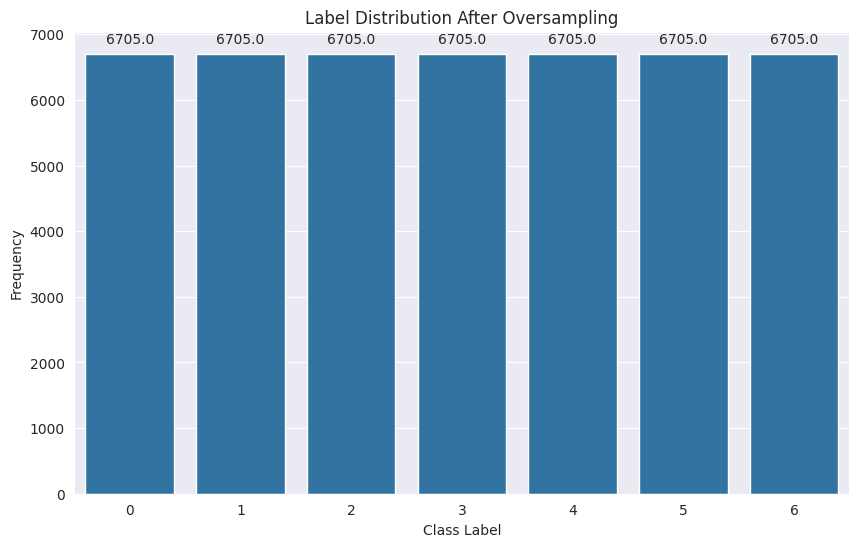

In [12]:
# Plot the distribution of labels after oversampling
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
ax = sns.countplot(x=Label)
plt.title("Label Distribution After Oversampling")
plt.xlabel("Class Label")
plt.ylabel("Frequency")

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [13]:
# Define class labels with their descriptions
classes = {4: ('nv', 'melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2: ('bkl', 'benign keratosis-like lesions'),
           1: ('bcc', 'basal cell carcinoma'),
           5: ('vasc', 'pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}

# Convert Label to a numpy array
Label = np.array(Label)
Label

array([2, 2, 2, ..., 6, 6, 6])

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Data, Label, test_size=0.20, random_state=49)

# Further split the test set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=49)

# Print the shapes of datasets to verify the split
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (37548, 28, 28, 3)
y_train shape: (37548,)
X_val shape: (4693, 28, 28, 3)
y_val shape: (4693,)
X_test shape: (4694, 28, 28, 3)
y_test shape: (4694,)


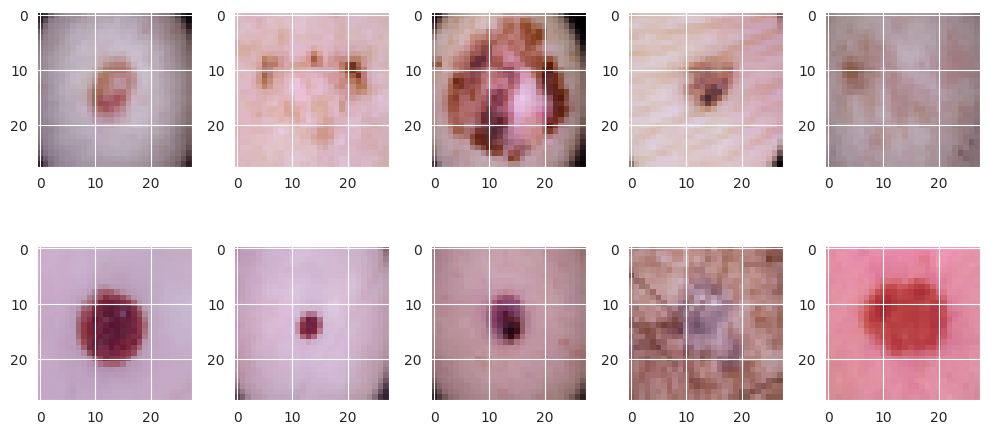

In [15]:
# Create a grid of subplots for displaying images
f, ax = plt.subplots(2, 5)
f.set_size_inches(10, 5)

# Initialize index for accessing images
k = 0

# Loop through grid to display images
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(X_train[k].reshape(28, 28, 3))  # Display image in subplot
        k += 1  # Move to the next image

# Adjust layout to prevent overlap
plt.tight_layout()

In [16]:
# Convert labels to one-hot encoded format for training, validation, and test sets
y_train = to_categorical(y_train, num_classes=7)
y_val = to_categorical(y_val, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

# Print shapes of the one-hot encoded label arrays
print("y_train shape", y_train.shape)
print("y_val shape", y_val.shape)
print("y_test shape", y_test.shape)

y_train shape (37548, 7)
y_val shape (4693, 7)
y_test shape (4694, 7)


In [17]:
# Custom generator that resizes images to target size on-the-fly
def custom_generator(X, y, batch_size, target_size=(224, 224)):
    while True:
        for start in range(0, len(X), batch_size):
            end = min(start + batch_size, len(X))
            batch_x = X[start:end]
            batch_y = y[start:end]
            # Resize images and yield batches
            batch_x_resized = np.array([tf.image.resize(img, target_size).numpy() for img in batch_x])
            yield batch_x_resized, batch_y

# Function to create a model with a custom head
def create_model(base_model, num_classes=7):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Dictionary of base models to evaluate
base_models = {
    'ResNet50': ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'DenseNet121': DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
}

# Setup data generators for training, validation, and testing
batch_size = 32
train_generator = custom_generator(X_train, y_train, batch_size=batch_size)
val_generator = custom_generator(X_val, y_val, batch_size=batch_size)
test_generator = custom_generator(X_test, y_test, batch_size=batch_size)

# Dictionary to store evaluation results
results = {}

# Iterate through each base model, create, compile, and train the model
for model_name, base_model in base_models.items():
    print(f"Training {model_name}...")

    if model_name == 'Custom_CNN':
        model = base_model
    else:
        model = create_model(base_model, num_classes=7)
        # Freeze the layers of the base model
        for layer in base_model.layers:
            layer.trainable = False

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Define callbacks for training
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    model.fit(train_generator,
              steps_per_epoch=len(X_train) // batch_size,
              validation_data=val_generator,
              validation_steps=len(X_val) // batch_size,
              epochs=8,
              callbacks=[reduce_lr, early_stopping])

    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(test_generator, steps=len(X_test) // batch_size)
    results[model_name] = {'Test Loss': loss, 'Test Accuracy': accuracy}

# Print summary of model performance
print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name} - Test Loss: {metrics['Test Loss']:.4f}, Test Accuracy: {metrics['Test Accuracy']:.4f}")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training ResNet50...
Epoch 1/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 210s 167ms/step - accuracy: 0.6337 - loss: 1.0358 - val_accuracy: 0.8425 - val_loss: 0.5122 - learning_rate: 1.0000e-04
Epoch 2/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 198s 164ms/step - accuracy: 0.8620 - loss: 0.4454 - val_accuracy: 0.8985 - val_loss: 0.3423 - learning_rate: 1.0000e-04
Epoch 3/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 202s 173ms/step - accuracy: 0.9145 - loss: 0.2942 - val_accuracy: 0.9294 - val_loss: 0.2478 - learning_rate: 1.0000e-04
Epoch 4/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 206s 176ms/step - accuracy: 0.9451 - loss: 0.2075 - val_accuracy: 0.9425 - val_loss: 0.1889 - learning_rate: 1.0000e-04
Epoch 5/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 189s 161ms/step - accuracy: 0.9624 - loss: 0.1508 - val_accuracy: 0.9561 - val_loss: 0.1523 - learning_rate: 1.0000e-04
Epoch 6/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 189s 161ms/step - accuracy: 0.9

In [18]:
# Define a custom CNN model with multiple convolutional blocks and dense layers
def My_Model():
    input_ = Input(shape=[224, 224, 3])  # Input layer for images

    # Convolutional blocks with BatchNormalization and L2 regularization
    x = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=tf.keras.regularizers.l2(0.001))(input_)
    x = MaxPooling2D()(x)
    x = BatchNormalization()(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = MaxPooling2D()(x)
    x = BatchNormalization()(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = MaxPooling2D()(x)
    x = BatchNormalization()(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = MaxPooling2D()(x)
    x = BatchNormalization()(x)

    # Flatten and dense layers with dropout and L2 regularization
    flatten = Flatten()(x)
    classifier = Dropout(rate=0.3)(flatten)
    classifier = Dense(units=256, activation='relu', kernel_initializer='he_normal',
                              kernel_regularizer=tf.keras.regularizers.l2(0.001))(classifier)
    classifier = BatchNormalization()(classifier)

    classifier = Dense(units=128, activation='relu', kernel_initializer='he_normal',
                              kernel_regularizer=tf.keras.regularizers.l2(0.001))(classifier)
    classifier = BatchNormalization()(classifier)

    classifier = Dense(units=64, activation='relu', kernel_initializer='he_normal',
                              kernel_regularizer=tf.keras.regularizers.l2(0.001))(classifier)
    classifier = BatchNormalization()(classifier)

    classifier = Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(),
                              kernel_initializer='he_normal')(classifier)
    classifier = BatchNormalization()(classifier)

    # Output layer with softmax activation
    classifier = Dense(units=7, activation='softmax', kernel_initializer="glorot_uniform", name='classifier')(classifier)

    return Model(inputs=input_, outputs=classifier)

# Dictionary of models to evaluate, including custom CNN and VGG16
base_models2 = {
    'VGG16': VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'Custom_CNN': My_Model()
}

# Dictionary to store evaluation results for each model
results2 = {}

# Train and evaluate each model
for model_name2, base_model2 in base_models2.items():
    print(f"Training {model_name2}...")

    if model_name2 == 'Custom_CNN':
        model2 = base_model2
    else:
        model2 = create_model(base_model2, num_classes=7)
        # Freeze layers of pre-trained base models
        for layer in base_model2.layers:
            layer.trainable = False

    # Compile the model
    model2.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Define training callbacks
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    model2.fit(train_generator,
              steps_per_epoch=len(X_train) // batch_size,
              validation_data=val_generator,
              validation_steps=len(X_val) // batch_size,
              epochs=8,
              callbacks=[reduce_lr, early_stopping])

    # Evaluate the model on test data
    loss2, accuracy2 = model2.evaluate(test_generator, steps=len(X_test) // batch_size)
    results2[model_name2] = {'Test Loss': loss2, 'Test Accuracy': accuracy2}

# Print summary of model performance
print("\nModel Performance Summary:")
for model_name2, metrics2 in results2.items():
    print(f"{model_name2} - Test Loss: {metrics2['Test Loss']:.4f}, Test Accuracy: {metrics2['Test Accuracy']:.4f}")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training VGG16...
Epoch 1/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 332s 269ms/step - accuracy: 0.5423 - loss: 1.2696 - val_accuracy: 0.7286 - val_loss: 0.7564 - learning_rate: 1.0000e-04
Epoch 2/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 312s 266ms/step - accuracy: 0.7628 - loss: 0.6872 - val_accuracy: 0.7981 - val_loss: 0.5949 - learning_rate: 1.0000e-04
Epoch 3/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 295s 251ms/step - accuracy: 0.8247 - loss: 0.5327 - val_accuracy: 0.8434 - val_loss: 0.4876 - learning_rate: 1.0000e-04
Epoch 4/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 323s 275ms/step - accuracy: 0.8654 - loss: 0.4307 - val_accuracy: 0.8696 - val_loss: 0.4139 - learning_rate: 1.0000e-04
Epoch 5/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 323s 276ms/step - accuracy: 0.8930 - loss: 0.3550 - val_accuracy: 0.8807 - val_loss: 0.3572 - learning_rate: 1.0000e-04
Epoch 6/8
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 301s 257ms/step - accuracy: 0.9143 - loss: 0.2958 - val_accuracy: 0.8957 - val_loss: 

In [19]:
# Combine the accuracy results from two model evaluation parts
results_summary = {}

# Add results for ResNet50 and DenseNet121
results_summary['ResNet50'] = {
    'Accuracy': results['ResNet50']['Test Accuracy']
}

results_summary['DenseNet121'] = {
    'Accuracy': results['DenseNet121']['Test Accuracy']
}

# Add results for VGG16 and Custom CNN
results_summary['VGG16'] = {
    'Accuracy': results2['VGG16']['Test Accuracy']
}

results_summary['Custom_CNN'] = {
    'Accuracy': results2['Custom_CNN']['Test Accuracy']
}

# Print the summary of model performance
print("\nModel Performance Summary:")
print(f"{'Model':<15} {'Accuracy':<10}")
for model_name, metrics in results_summary.items():
    print(f"{model_name:<15} {metrics['Accuracy']:<10.4f}")


Model Performance Summary:
Model           Accuracy  
ResNet50        0.9707    
DenseNet121     0.7962    
VGG16           0.9302    
Custom_CNN      0.9625    


In [20]:
# Custom generator that resizes images on-the-fly
def custom_generator(X, y, batch_size, target_size=(224, 224)):
    while True:
        for start in range(0, len(X), batch_size):
            end = min(start + batch_size, len(X))
            batch_x = X[start:end]
            batch_y = y[start:end]
            # Resize each image in the batch
            batch_x_resized = np.array([tf.image.resize(img, target_size).numpy() for img in batch_x])
            yield batch_x_resized, batch_y

# Setup generators for training, validation, and testing
batch_size = 32
train_generator = custom_generator(X_train, y_train, batch_size=batch_size)
val_generator = custom_generator(X_val, y_val, batch_size=batch_size)
test_generator = custom_generator(X_test, y_test, batch_size=batch_size)

# Define the custom CNN model
def My_Model():
    input_ = Input(shape=[224, 224, 3])  # Input shape for images

    # Convolutional and pooling blocks with L2 regularization
    x = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
               kernel_regularizer=tf.keras.regularizers.l2(0.001))(input_)
    x = MaxPooling2D()(x)
    x = BatchNormalization()(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
               kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
               kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = MaxPooling2D()(x)
    x = BatchNormalization()(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
               kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
               kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = MaxPooling2D()(x)
    x = BatchNormalization()(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
               kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
               kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = MaxPooling2D()(x)
    x = BatchNormalization()(x)

    # Flatten and dense layers with L2 regularization and dropout
    flatten = Flatten()(x)
    classifier = Dropout(rate=0.3)(flatten)
    classifier = Dense(units=256, activation='relu', kernel_initializer='he_normal',
                       kernel_regularizer=tf.keras.regularizers.l2(0.001))(classifier)
    classifier = BatchNormalization()(classifier)

    classifier = Dense(units=128, activation='relu', kernel_initializer='he_normal',
                       kernel_regularizer=tf.keras.regularizers.l2(0.001))(classifier)
    classifier = BatchNormalization()(classifier)

    classifier = Dense(units=64, activation='relu', kernel_initializer='he_normal',
                       kernel_regularizer=tf.keras.regularizers.l2(0.001))(classifier)
    classifier = BatchNormalization()(classifier)

    classifier = Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(),
                       kernel_initializer='he_normal')(classifier)
    classifier = BatchNormalization()(classifier)

    # Output layer with 7 classes
    classifier = Dense(units=7, activation='softmax', kernel_initializer="glorot_uniform", name='classifier')(classifier)

    return Model(inputs=input_, outputs=classifier)

# Initialize and compile the model
model = My_Model()
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define training callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with the custom generator
history = model.fit(train_generator,
                    steps_per_epoch=len(X_train) // batch_size,
                    validation_data=val_generator,
                    validation_steps=len(X_val) // batch_size,
                    epochs=20,
                    callbacks=[reduce_lr, early_stopping])

Epoch 1/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 243s 196ms/step - accuracy: 0.5816 - loss: 3.9344 - val_accuracy: 0.8619 - val_loss: 3.1036 - learning_rate: 1.0000e-04
Epoch 2/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 232s 193ms/step - accuracy: 0.8869 - loss: 3.0002 - val_accuracy: 0.9392 - val_loss: 2.6831 - learning_rate: 1.0000e-04
Epoch 3/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 225s 192ms/step - accuracy: 0.9456 - loss: 2.6279 - val_accuracy: 0.9508 - val_loss: 2.4324 - learning_rate: 1.0000e-04
Epoch 4/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 265s 226ms/step - accuracy: 0.9580 - loss: 2.3752 - val_accuracy: 0.9601 - val_loss: 2.2122 - learning_rate: 1.0000e-04
Epoch 5/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 261s 223ms/step - accuracy: 0.9700 - loss: 2.1544 - val_accuracy: 0.9555 - val_loss: 2.0721 - learning_rate: 1.0000e-04
Epoch 6/20
1173/1173 ━━━━━━━━━━━━━━━━━━━━ 222s 189ms/step - accuracy: 0.9723 - loss: 1.9888 - val_accuracy: 0.9635 - val_loss: 1.8816 - learning_rate: 1.0000e-04
Epoch 7/20
1173/1173 ━━━━━━━

In [21]:
# Evaluate the model on test data and check test accuracy
loss, accuracy = model.evaluate(test_generator, steps=len(X_test) // batch_size)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - accuracy: 0.9752 - loss: 0.8564
Test Loss: 0.8548, Test Accuracy: 0.9760


In [22]:
# Callback for reducing learning rate when validation accuracy plateaus
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=2,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

# Early stopping callback to prevent overfitting and save time if the validation performance not improve
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [23]:
from tensorflow.keras import layers, models, regularizers

# Define the custom CNN model with L2 regularization and fine-tuned dropout rates
def My_Model():
    input_ = layers.Input(shape=[28, 28, 3])  # Input shape for images

    # First convolutional block with L2 regularization
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=regularizers.l2(0.001))(input_)
    x = layers.MaxPooling2D()(x)
    x = layers.BatchNormalization()(x)

    # Second convolutional block
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.MaxPooling2D()(x)
    x = layers.BatchNormalization()(x)

    # Third convolutional block
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.MaxPooling2D()(x)
    x = layers.BatchNormalization()(x)

    # Fourth convolutional block
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal',
                      kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.MaxPooling2D()(x)
    x = layers.BatchNormalization()(x)

    # Flatten and dense layers with L2 regularization and dropout
    flatten = layers.Flatten()(x)
    classifier = layers.Dropout(rate=0.3)(flatten)
    classifier = layers.Dense(units=256, activation='relu', kernel_initializer='he_normal',
                              kernel_regularizer=regularizers.l2(0.001))(classifier)
    classifier = layers.BatchNormalization()(classifier)

    classifier = layers.Dense(units=128, activation='relu', kernel_initializer='he_normal',
                              kernel_regularizer=regularizers.l2(0.001))(classifier)
    classifier = layers.BatchNormalization()(classifier)

    classifier = layers.Dense(units=64, activation='relu', kernel_initializer='he_normal',
                              kernel_regularizer=regularizers.l2(0.001))(classifier)
    classifier = layers.BatchNormalization()(classifier)

    classifier = layers.Dense(units=32, activation='relu', kernel_regularizer=regularizers.L1L2(),
                              kernel_initializer='he_normal')(classifier)
    classifier = layers.BatchNormalization()(classifier)

    # Output layer with 7 classes
    classifier = layers.Dense(units=7, activation='softmax', kernel_initializer="glorot_uniform", name='classifier')(classifier)

    return models.Model(inputs=input_, outputs=classifier)

# Initialize and summarize the model
model = My_Model()
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 28, 28, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 3, 3, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 1, 1, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 1,276,103 (4.87 MB)

 Trainable params: 1,274,183 (4.86 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [24]:
# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

# Train the model with early stopping and learning rate reduction
history = model.fit(
    X_train,
    y_train,
    epochs=30,  # Number of epochs to train
    batch_size=128,  # Batch size for training
    validation_data=(X_val, y_val),  # Validation data
    callbacks=[learning_rate_reduction, early_stopping]  # Callbacks for learning rate reduction and early stopping
)

Epoch 1/30
294/294 ━━━━━━━━━━━━━━━━━━━━ 39s 75ms/step - accuracy: 0.5336 - loss: 3.9908 - val_accuracy: 0.6936 - val_loss: 3.1231 - learning_rate: 0.0010
Epoch 2/30
294/294 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.8434 - loss: 2.6014 - val_accuracy: 0.6910 - val_loss: 2.6143 - learning_rate: 0.0010
Epoch 3/30
294/294 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8950 - loss: 1.9625 - val_accuracy: 0.7025 - val_loss: 2.2611 - learning_rate: 0.0010
Epoch 4/30
294/294 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9166 - loss: 1.5310 - val_accuracy: 0.8466 - val_loss: 1.5093 - learning_rate: 0.0010
Epoch 5/30
294/294 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9263 - loss: 1.2468 - val_accuracy: 0.8116 - val_loss: 1.4603 - learning_rate: 0.0010
Epoch 6/30
294/294 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9425 - loss: 1.0275 - val_accuracy: 0.8811 - val_loss: 1.1159 - learning_rate: 0.0010
Epoch 7/30
294/294 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9436 - loss: 

In [25]:
# Save the original model after training
model.save('my_model.h5')

In [34]:
model.save("my_model.keras")   # recommended modern format


In [26]:
model.save("/content/drive/MyDrive/my_model.h5")

In [35]:
model.save("/content/drive/MyDrive/my_model.keras")

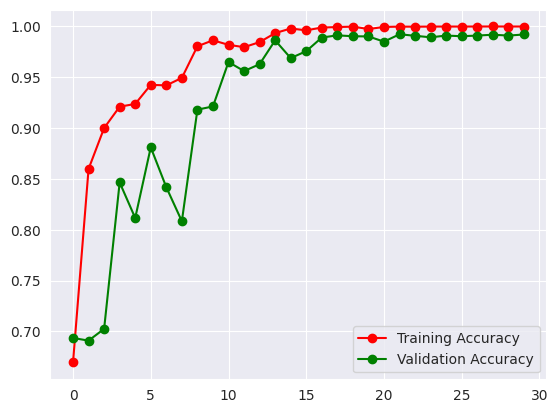

In [27]:
# Plot training and validation accuracy
plt.plot(history.history["accuracy"], 'ro-', label="Training Accuracy")  # Training accuracy plot
plt.plot(history.history["val_accuracy"], 'go-', label="Validation Accuracy")  # Validation accuracy plot
plt.legend()
plt.show()  # Display the plot

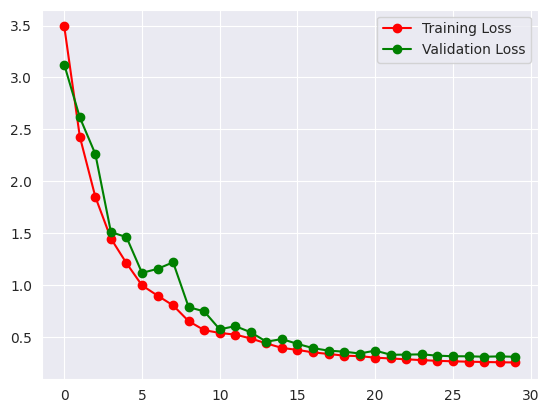

In [28]:
#plot Training and Validation loss like above accuracy
plt.plot(history.history["loss"] , 'ro-' , label = "Training Loss")
plt.plot(history.history["val_loss"] , 'go-' , label = "Validation Loss")
plt.legend()
plt.show()

In [29]:
#Evaluate the model to check the test accuaracy
model.evaluate(X_test , y_test)

147/147 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9874 - loss: 0.3337


[0.31799402832984924, 0.989561140537262]

In [30]:
# Define the class names and their short names
class_names = {
    0: 'Actinic Keratoses',  # akiec
    1: 'Basal Cell Carcinoma',  # bcc
    2: 'Benign Keratosis-like Lesions',  # bkl
    3: 'Dermatofibroma',  # df
    4: 'Melanocytic Nevi',  # nv
    5: 'Melanoma',  # mel
    6: 'Vascular Lesions'  # vasc
}

# Short names for confusion matrix
short_names = ['akiec', 'bcc', 'bkl', 'df', 'nv', 'mel', 'vasc']


# Evaluate the model on the validation set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(short_names)))

# Show the class names with their indices
print("\nFull Class Names with Short name:")
for index, name in class_names.items():
    print(f"       {short_names[index]}: {name}")

147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
Classification Report:
              precision    recall  f1-score   support

       akiec       1.00      1.00      1.00       666
         bcc       1.00      1.00      1.00       675
         bkl       0.97      1.00      0.98       668
          df       1.00      1.00      1.00       669
          nv       1.00      0.93      0.96       652
         mel       1.00      1.00      1.00       667
        vasc       0.97      1.00      0.98       697

    accuracy                           0.99      4694
   macro avg       0.99      0.99      0.99      4694
weighted avg       0.99      0.99      0.99      4694


Full Class Names with Short name:
       akiec: Actinic Keratoses
       bcc: Basal Cell Carcinoma
       bkl: Benign Keratosis-like Lesions
       df: Dermatofibroma
       nv: Melanocytic Nevi
       mel: Melanoma
       vasc: Vascular Lesions


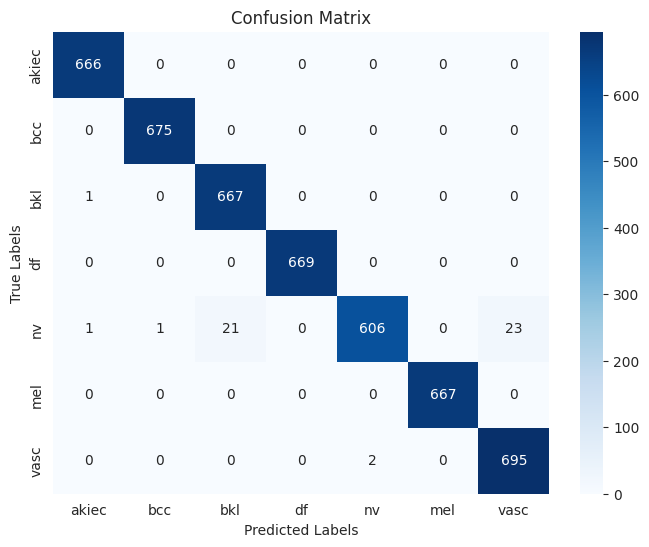

In [31]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix with short names
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=short_names, yticklabels=short_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

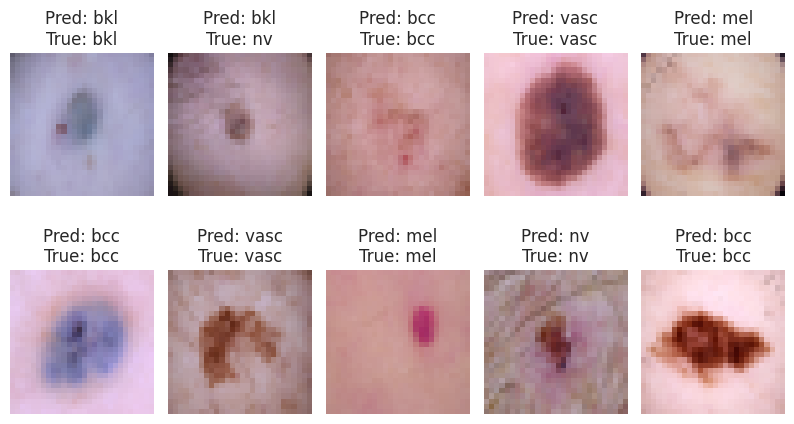

In [32]:
    # Assuming correct is a list of indices where the model correctly classified the images
    correct = [12,1,2,13,55,5,16,78,8,11]
    
    plt.figure(figsize=(10, 5))
    for i, c in enumerate(correct[:10]):  # Loop through the first 10 correct indices
        plt.subplot(2, 5, i + 1)  # Arrange the plots in a 2x5 grid
        plt.imshow(X_val[c])
        plt.title(f"Pred: {short_names[y_pred_classes[c]]}\nTrue: {short_names[y_true[c]]}")
        plt.axis('off')
    
    # Adjust the space between rows and columns
    plt.subplots_adjust(wspace=0.1, hspace=0.3)  # Reduce hspace to reduce vertical space between rows
    
    plt.show()

In [33]:
# Assuming correct is a list of correctly classified examples
for c in correct[:10]:
    print(f"Index: {c}, Predicted: {y_pred_classes[c]}, True: {y_true[c]}")

Index: 12, Predicted: 2, True: 2
Index: 1, Predicted: 2, True: 4
Index: 2, Predicted: 1, True: 1
Index: 13, Predicted: 6, True: 6
Index: 55, Predicted: 5, True: 5
Index: 5, Predicted: 1, True: 1
Index: 16, Predicted: 6, True: 6
Index: 78, Predicted: 5, True: 5
Index: 8, Predicted: 4, True: 4
Index: 11, Predicted: 1, True: 1


In [ ]:
keras.utils.plot_model(model)